<a href="https://colab.research.google.com/github/ismachy/Introduction-to-ML/blob/main/HW6_Problem2_a_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Problem 2 a
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import time
import matplotlib.pyplot as plt


In [ ]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [ ]:
train_images

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
test_images

array([[[[158, 112,  49],
         [159, 111,  47],
         [165, 116,  51],
         ...,
         [137,  95,  36],
         [126,  91,  36],
         [116,  85,  33]],

        [[152, 112,  51],
         [151, 110,  40],
         [159, 114,  45],
         ...,
         [136,  95,  31],
         [125,  91,  32],
         [119,  88,  34]],

        [[151, 110,  47],
         [151, 109,  33],
         [158, 111,  36],
         ...,
         [139,  98,  34],
         [130,  95,  34],
         [120,  89,  33]],

        ...,

        [[ 68, 124, 177],
         [ 42, 100, 148],
         [ 31,  88, 137],
         ...,
         [ 38,  97, 146],
         [ 13,  64, 108],
         [ 40,  85, 127]],

        [[ 61, 116, 168],
         [ 49, 102, 148],
         [ 35,  85, 132],
         ...,
         [ 26,  82, 130],
         [ 29,  82, 126],
         [ 20,  64, 107]],

        [[ 54, 107, 160],
         [ 56, 105, 149],
         [ 45,  89, 132],
         ...,
         [ 24,  77, 124],
        

In [ ]:
test_labels

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [ ]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
# Convert binary class matrices
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [ ]:
# Model
model = models.Sequential()
model.add(layers.Flatten(input_shape=(32, 32, 3)))

In [ ]:
# Hidden layer with 512 units
model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

# Model Compiling
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1578506 (6.02 MB)
Trainable params: 1578506 (6.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Start time
start_time = time.time()

# Train the model
output = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# End time
end_time = time.time()

# Calculate training time
training_time = end_time - start_time

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)

Epoch 1/10
1563/1563 [==============================] - 33s 20ms/step - loss: 1.8915 - accuracy: 0.3302 - val_loss: 1.7706 - val_accuracy: 0.3535
Epoch 2/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.7015 - accuracy: 0.3924 - val_loss: 1.6491 - val_accuracy: 0.4090
Epoch 3/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.6377 - accuracy: 0.4167 - val_loss: 1.6004 - val_accuracy: 0.4303
Epoch 4/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.5931 - accuracy: 0.4348 - val_loss: 1.6032 - val_accuracy: 0.4288
Epoch 5/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.5618 - accuracy: 0.4463 - val_loss: 1.5465 - val_accuracy: 0.4515
Epoch 6/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.5447 - accuracy: 0.4525 - val_loss: 1.5587 - val_accuracy: 0.4449
Epoch 7/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.5258 - accuracy: 0.4580 - val_loss: 1.5412 -

In [ ]:
print(f"\nTraining Time: {training_time:.2f} seconds")
print(f"Training Loss: {output.history['loss'][-1]:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Training Time: 324.57 seconds
Training Loss: 1.4861
Test Accuracy: 0.4641


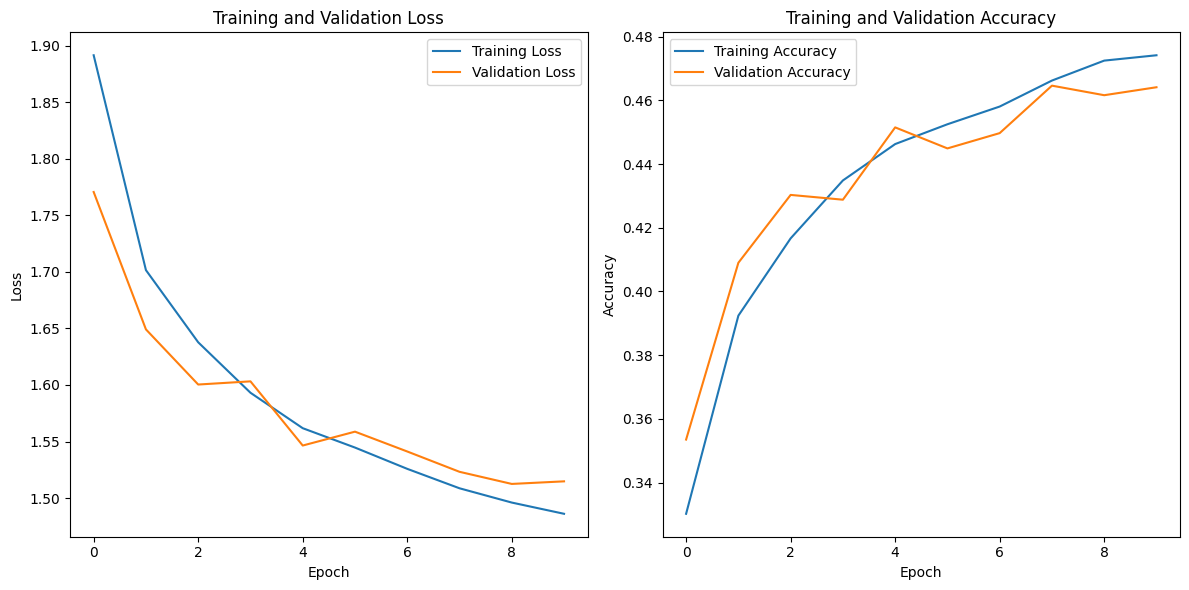

In [ ]:
# Plot training loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(output.history['loss'], label='Training Loss')
plt.plot(output.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(output.history['accuracy'], label='Training Accuracy')
plt.plot(output.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Problem 2 b
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [ ]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
# Convert binary class matrices
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [ ]:
# Define the model with two additional hidden layers
model = models.Sequential()
model.add(layers.Flatten(input_shape=(32, 32, 3)))
model.add(layers.Dense(512, activation='relu'))  # Hidden layer with 512 units
model.add(layers.Dense(256, activation='relu'))  # Hidden layer with 256 units
model.add(layers.Dense(256, activation='relu'))  # Hidden layer with 256 units
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
# Model Compiling
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Start time
start_time = time.time()

# Train the model for 300 epochs
history = model.fit(train_images, train_labels, epochs=300, validation_data=(test_images, test_labels))

# Record the end time
end_time = time.time()

# Calculate training time
training_time = end_time - start_time

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)

Epoch 1/300
1563/1563 [==============================] - 43s 27ms/step - loss: 1.8745 - accuracy: 0.3164 - val_loss: 1.6938 - val_accuracy: 0.3893
Epoch 2/300
1563/1563 [==============================] - 38s 25ms/step - loss: 1.6886 - accuracy: 0.3937 - val_loss: 1.6852 - val_accuracy: 0.4026
Epoch 3/300
1563/1563 [==============================] - 40s 26ms/step - loss: 1.5990 - accuracy: 0.4245 - val_loss: 1.5637 - val_accuracy: 0.4423
Epoch 4/300
1563/1563 [==============================] - 38s 24ms/step - loss: 1.5419 - accuracy: 0.4453 - val_loss: 1.5712 - val_accuracy: 0.4405
Epoch 5/300
1563/1563 [==============================] - 40s 26ms/step - loss: 1.5018 - accuracy: 0.4635 - val_loss: 1.5209 - val_accuracy: 0.4578
Epoch 6/300
1563/1563 [==============================] - 39s 25ms/step - loss: 1.4642 - accuracy: 0.4763 - val_loss: 1.5102 - val_accuracy: 0.4593
Epoch 7/300
1563/1563 [==============================] - 38s 24ms/step - loss: 1.4378 - accuracy: 0.4866 - val_loss: 1

In [ ]:
print(f"\nTraining Time: {training_time:.2f} seconds")
print(f"Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Training Time: 11785.67 seconds
Training Loss: 0.4443
Test Accuracy: 0.4464


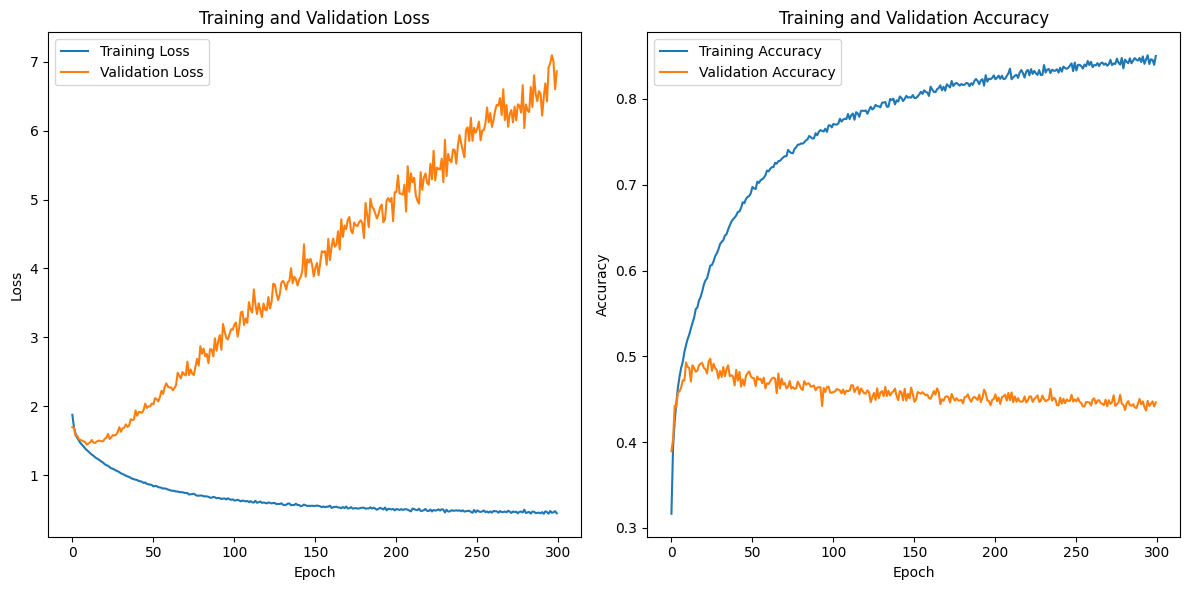

In [ ]:
import matplotlib.pyplot as plt

# Plotting training loss and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1573376   
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1773066 (6.76 MB)
Trainable params: 1773066 (6.76 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
